# Week 4 : Pima Indian Diabetes

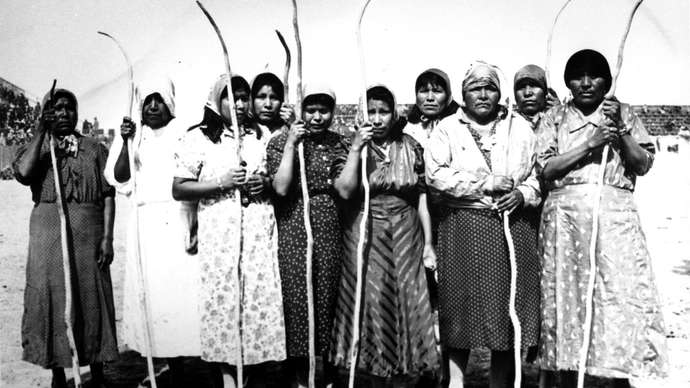

Wikipedia : https://en.wikipedia.org/wiki/Pima_people

Download the data : https://www.kaggle.com/uciml/pima-indians-diabetes-database

<b> About Datasets: </b>

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

## Loading Packages And Datasets

In [2]:
# 기본적인 패키지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델링
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 평가
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/diabetes.csv')
df_copy = df.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Glimpse the Data

In [4]:
print("Pima Indian Diabetes's Shape", df.shape)

Pima Indian Diabetes's Shape (768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


모두 Numerical한 데이터임.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X_feature = df.iloc[:, :-1]
y_target  = df['Outcome']

### Check the target

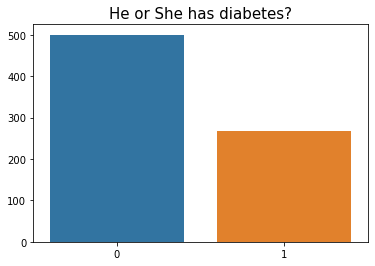

In [8]:
sns.barplot(x = y_target.value_counts().index, y = y_target.value_counts().values)
plt.title('He or She has diabetes?', size = 15)
plt.show()

In [9]:
print('Percent of Diabetes: ', round(y_target.value_counts().values[1] / df.shape[0],3))

Percent of Diabetes:  0.349


### Missing Value

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA

### Correlation

In [11]:
def plot_corr(data):
    plt.figure(figsize = (8,8))
    correlation = df.corr()
    cmap = sns.diverging_palette(250,10,80)
    sns.heatmap(correlation, cmap=cmap, square=True, linewidths=.5, annot = True, fmt = '.2f', cbar_kws={'shrink' : .5})
    plt.show()

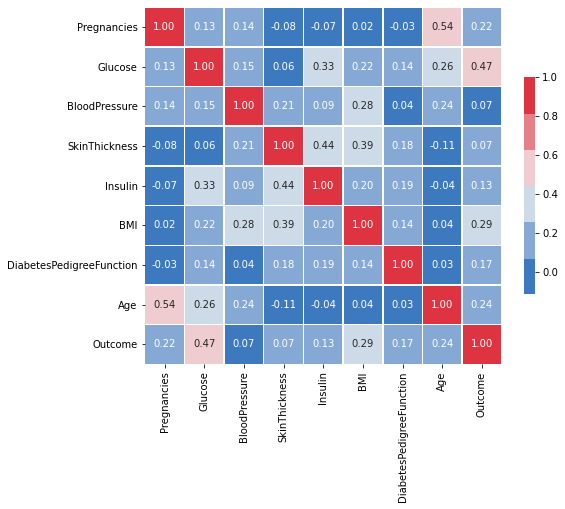

In [12]:
plot_corr(df_copy)

* Age and Pregnancies (0.54)

* Outcome and Glucose (0.47)

* Insulin and SkinThickness (0.44)

### Feature Plot

In [13]:
def feature_plot(data):
    sns.set_style('darkgrid')
    plt.figure(figsize = (6,6))
    for feature in X_feature:
        sns.displot(x = feature, hue = df['Outcome'], kind = 'kde', data = df)
        plt.title('Distribution of ' + str(feature), size = 16)
        plt.xlabel(str(feature), size = 14)
        plt.ylabel('Densitiy', size = 14)
        plt.show()

<Figure size 432x432 with 0 Axes>

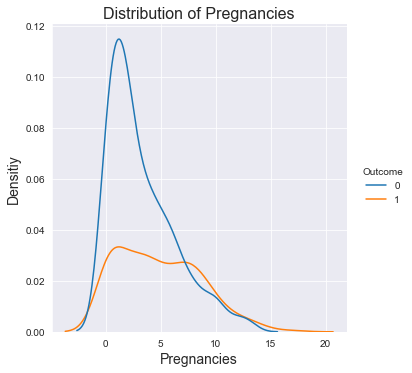

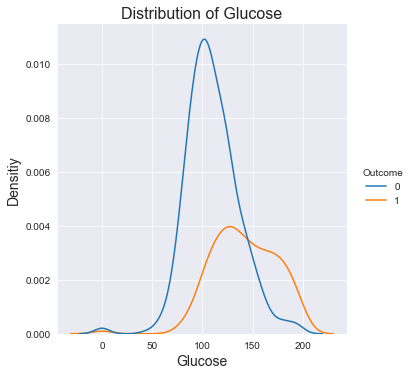

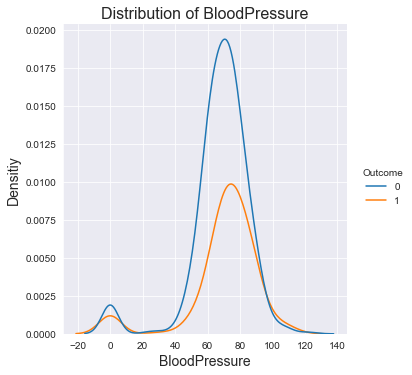

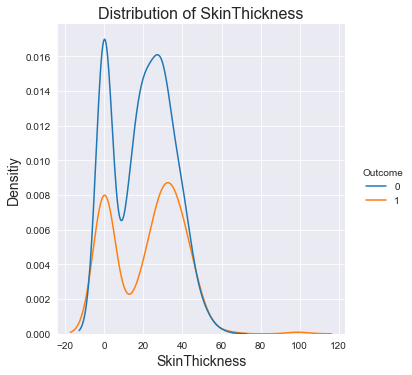

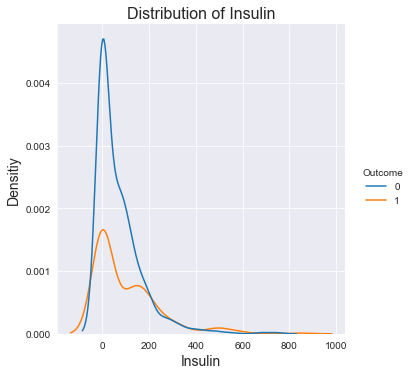

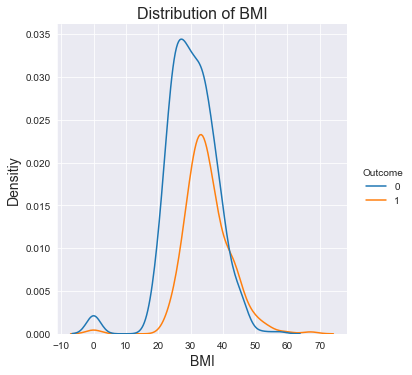

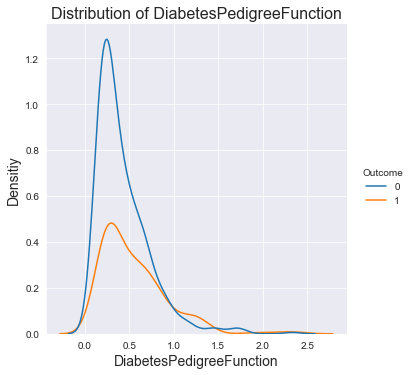

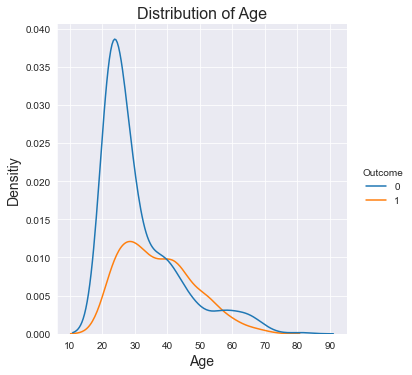

In [14]:
feature_plot(df)

'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose'

## Feature Engineering

### Impute the Missing Value

In [15]:
missing = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Glucose']

for feature in missing:
    df[feature].replace(0, np.nan, inplace = True)
    df[feature].fillna(df.groupby('Outcome')[feature].transform('median'), inplace = True)

### After

<Figure size 432x432 with 0 Axes>

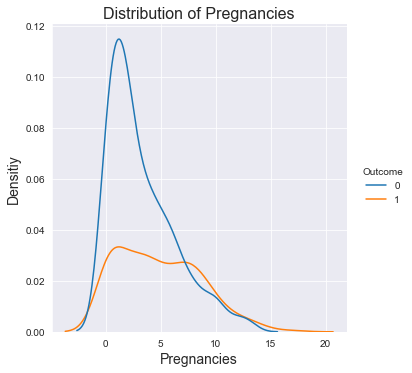

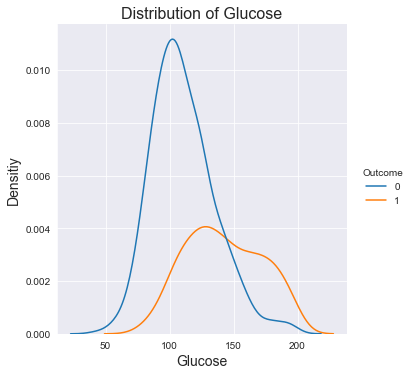

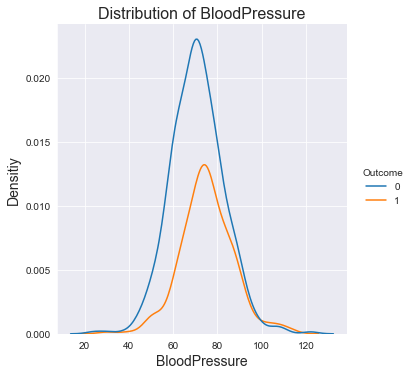

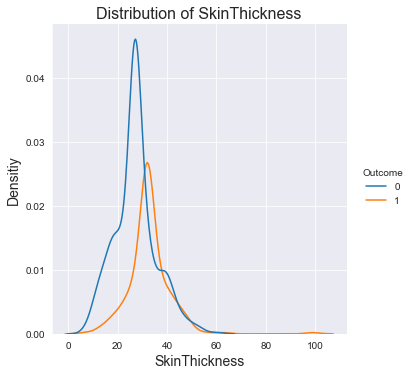

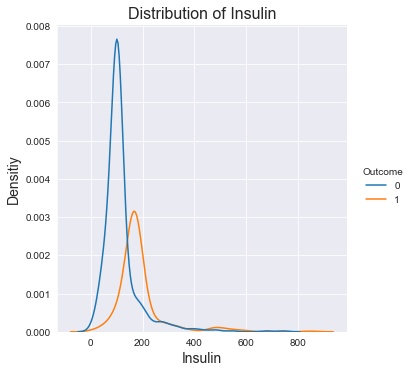

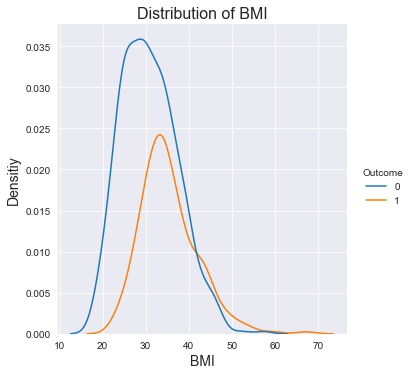

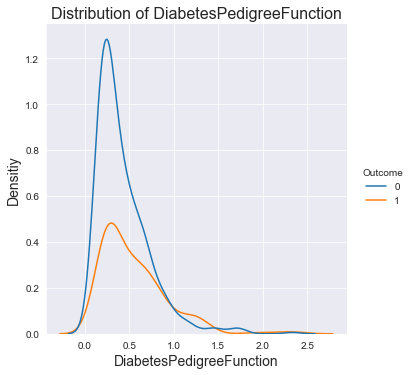

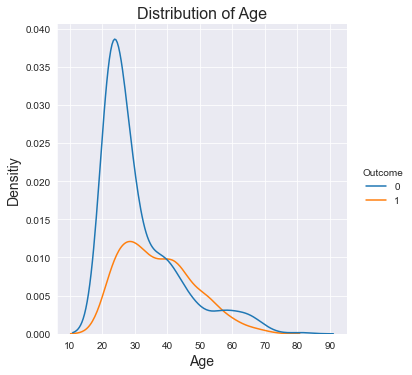

In [16]:
feature_plot(df)

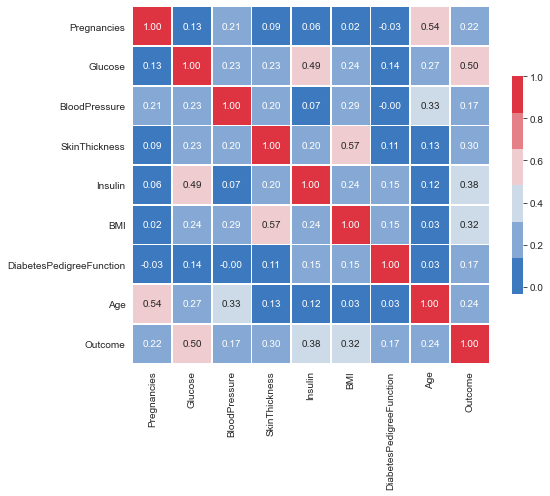

In [17]:
plot_corr(df)

* BMI and SkinThickness(0.39) > (0.57) 
* Age and Pregnancies (0.54)
* Outcome and Glucose (0.47) > (0.5)
* Glucose and Insulin (0.33) > (0.49) 
* Outcome and Insulin (0.13) > (0.38)

### Make Derived Variables

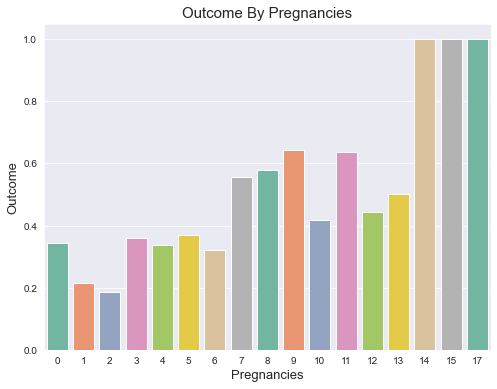

In [18]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Pregnancies', y = 'Outcome', data = df, ci = None, palette = 'Set2')
plt.title('Outcome By Pregnancies', size = 15)
plt.xlabel('Pregnancies', size =13)
plt.ylabel('Outcome', size = 13)
plt.show()

7명 이상부터 Outcome의 평균값이 올라가기 시작함.

In [19]:
df['Pregnancies_high'] = df['Pregnancies'] > 6

### Drop the Outlier

In [20]:
def get_outlier(column):
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    
    Outlier_min = Q1 -  IQR * 1.5
    Outlier_max = Q3 + IQR * 1.5
    
    return Outlier_min, Outlier_max

In [21]:
get_outlier(df['Insulin'])

(2.0, 270.0)

In [22]:
df[df['Insulin'] > 270].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,False
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,False
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1,True
54,7,150.0,66.0,42.0,342.0,34.7,0.718,42,0,True
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1,True


In [23]:
df[df['Insulin'] > 650]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,False
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0,False
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23,0,False


In [24]:
outlier = df[df['Insulin'] > 650].index
print('Before drop the outlier: ', df.shape)
#df.drop(outlier, axis = 0, inplace = True)
#print('After drop the outlier', df.shape)

Before drop the outlier:  (768, 10)


## Modeling

In [25]:
X_features = df.drop(['Pregnancies', 'Outcome'], axis = 1)
y_target = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

In [26]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

models = [dt, rf, xgb, lgbm]

def get_models(models):
    for model in models:
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        print(str(model) + '\n{} \n'.format(classification_report(y_test, y_predict)))

In [27]:
get_models(models)

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       157
           1       0.72      0.69      0.70        74

    accuracy                           0.81       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.81      0.81      0.81       231
 

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       157
           1       0.83      0.85      0.84        74

    accuracy                           0.90       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.90      0.90      0.90       231
 

XGBClassifier()
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       157
           1       0.86      0.88      0.87        74

    accuracy                           0.91       231
   macro avg       0.90      0.90      0.90       231
weig

### Feature Importance

In [28]:
def get_feature_importances(models):
    for model in models:
        model.fit(X_train, y_train)
        importances = model.feature_importances_
        importances = pd.Series(importances, index = X_train.columns)
        importances= importances.sort_values(ascending = False)
        sns.barplot(x = importances.values, y = importances.index)
        plt.title(str(model) + ' Feature Importance', size = 15)
        plt.show()

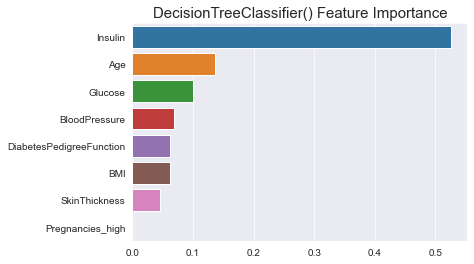

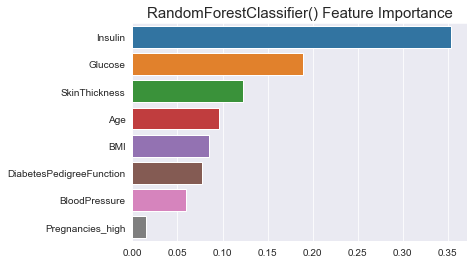

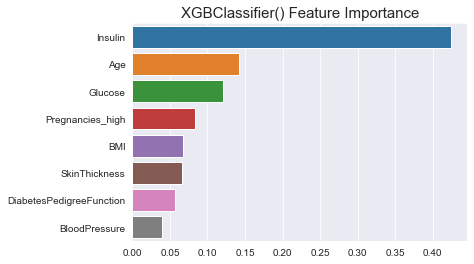

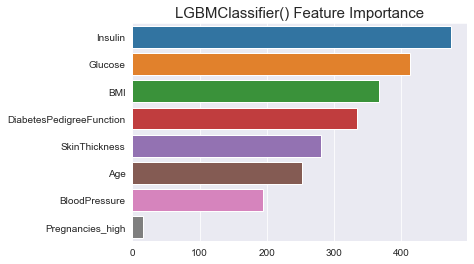

In [29]:
get_feature_importances(models)

### GridSerchCV

In [34]:
params = {'max_depth':[2,3,5,7], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,5,8]}

gridcv = GridSearchCV(dt, param_grid = params, scoring = 'f1', cv = 5)
gridcv.fit(X_train, y_train)
result = pd.DataFrame(gridcv.cv_results_)
result.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002593,4.884414e-04,0.001995,6.309772e-04,7,5,2,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s...",0.810811,0.789474,0.809524,0.756757,0.833333,0.799980,0.025688,1
28,0.003790,9.770583e-04,0.001995,6.308264e-04,7,1,3,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.769231,0.835443,0.853659,0.722222,0.805556,0.797222,0.047167,2
32,0.002794,3.952742e-04,0.002192,3.952027e-04,7,5,4,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s...",0.810811,0.789474,0.819277,0.729730,0.833333,0.796525,0.036299,3
31,0.002593,4.885582e-04,0.001995,3.162980e-07,7,5,3,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s...",0.810811,0.773333,0.809524,0.750000,0.833333,0.795400,0.029746,4
29,0.003192,3.988505e-04,0.001795,3.987551e-04,7,1,4,"{'max_depth': 7, 'min_samples_leaf': 1, 'min_s...",0.756757,0.825000,0.864198,0.722222,0.788732,0.791382,0.049842,5
9,0.002194,3.988981e-04,0.002194,3.988505e-04,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.767123,0.835443,0.857143,0.633333,0.821918,0.782992,0.080516,6
10,0.002393,4.885193e-04,0.001795,3.990174e-04,3,1,3,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.767123,0.835443,0.857143,0.633333,0.821918,0.782992,0.080516,6
11,0.002593,4.886945e-04,0.001795,3.988506e-04,3,1,4,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.767123,0.835443,0.837209,0.633333,0.821918,0.779005,0.077170,8
18,0.002983,1.500212e-05,0.002004,1.847496e-05,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.789474,0.784810,0.850000,0.676471,0.789474,0.778046,0.056217,9
13,0.001995,1.784161e-07,0.002194,3.990412e-04,3,5,3,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.767123,0.835443,0.850575,0.610169,0.821918,0.777046,0.088064,10
